In [3]:
import sys
import pandas as pd
import sklearn as sk
import tensorflow as tf
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
from tensorflow.python.client import device_lib
print("GPU is", "available " + str(device_lib.list_local_devices()[1]) if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.1
Scikit-Learn 0.23.2
GPU is available name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1437850011
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3403144232941753976
physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"



In [4]:
import time

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_sc, x_test_sc = x_train / 255.0, x_test / 255.0

print("DATA LOADED, with shapes ---> ", x_train_sc.shape, x_test_sc.shape)

DATA LOADED, with shapes --->  (60000, 28, 28) (10000, 28, 28)


In [5]:
# import numpy as np
# import matplotlib.pyplot as plt

# for example in np.random.randint(x_train.shape[0], size = 10):
#     f, axarr = plt.subplots(1,2)
#     axarr[0].imshow(x_train[example])
#     axarr[1].imshow(x_train_sc[example])
    

In [6]:
xtr1 = x_train_sc.reshape(x_train_sc.shape[0], 28, 28, 1)
xte1 = x_test_sc.reshape(x_test_sc.shape[0], 28, 28, 1)

In [7]:

import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3), input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32,(3,3), input_shape=(28, 28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
import time
t0 = time.time()
model.fit(xtr1, y_train, epochs=10)

model.evaluate(xte1,  y_test, verbose=2)
t1 = time.time()

print(f" Training time: {t1-t0}")

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.1694 - accuracy: 0.9488
Epoch 2/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0599 - accuracy: 0.9818
Epoch 3/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0451 - accuracy: 0.9863
Epoch 4/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0359 - accuracy: 0.9888
Epoch 5/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0303 - accuracy: 0.9906
Epoch 6/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0261 - accuracy: 0.9912
Epoch 7/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0221 - accuracy: 0.9930
Epoch 8/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0205 - accuracy: 0.9935
Epoch 9/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0194 - accuracy: 0.9

## Model Performance

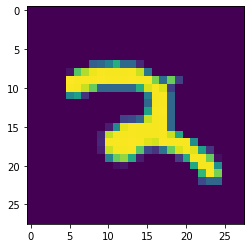

 Model thinks this is a 2


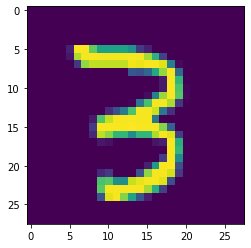

 Model thinks this is a 3


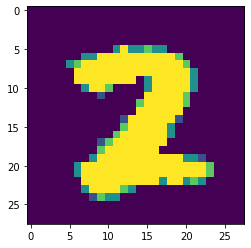

 Model thinks this is a 2


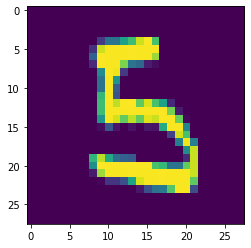

 Model thinks this is a 5


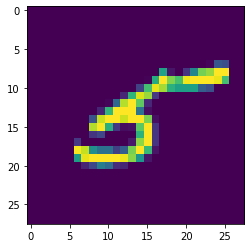

 Model thinks this is a 5


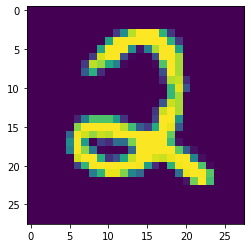

 Model thinks this is a 2


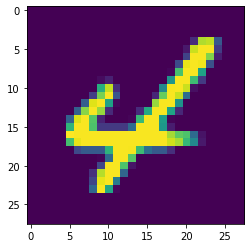

 Model thinks this is a 4


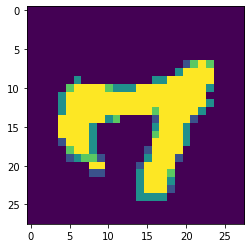

 Model thinks this is a 7


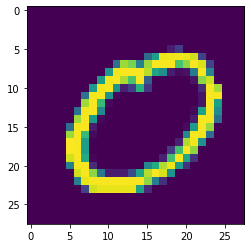

 Model thinks this is a 0


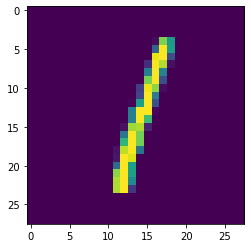

 Model thinks this is a 1
 Inference time: 2.2973005771636963


In [9]:
import numpy as np
import matplotlib.pyplot as plt

t0 = time.time()
for example in np.random.randint(x_train.shape[0], size = 10):
    plt.imshow(x_train_sc[example])
    plt.show()
    print(f" Model thinks this is a {model.predict_classes(x_train_sc[example].reshape(1, 28,28,1))[0]}")
t1 = time.time()
print(f" Inference time: {t1-t0}")